In [2]:
import pandas as pd

df = pd.read_csv('PreprocessedData2.csv')
df.drop('Unnamed: 0', axis=1, inplace = True)

In [2]:
df.set_index('Date', inplace=True)

In [3]:
forecast_out = 7

dfs = df.copy()[df['State_Name'] == 7]
dfs["Prediction"] = dfs['Total_Confirmed'].shift(-forecast_out)

In [4]:
dfs.head(20)

,Confirmed,Deceased,Recovered,State_Name,Total_Confirmed,Total_Deceased,Total_Recovered,Prediction
Date,,,,,,,,
2020-03-14,0,0,0,7,0,0,0,0.0
2020-03-15,0,0,0,7,0,0,0,0.0
2020-03-16,0,0,0,7,0,0,0,0.0
2020-03-17,0,0,0,7,0,0,0,0.0
2020-03-18,0,0,0,7,0,0,0,0.0
2020-03-19,0,0,0,7,0,0,0,0.0
2020-03-20,0,0,0,7,0,0,0,0.0
2020-03-21,0,0,0,7,0,0,0,0.0
2020-03-22,0,0,0,7,0,0,0,0.0


In [5]:
dfs.tail(20)

,Confirmed,Deceased,Recovered,State_Name,Total_Confirmed,Total_Deceased,Total_Recovered,Prediction
Date,,,,,,,,
2020-07-18,45,0,22,7,655,2,436,903.0
2020-07-19,37,0,14,7,692,2,450,952.0
2020-07-20,21,0,15,7,713,2,465,988.0
2020-07-21,28,0,10,7,741,2,475,1032.0
2020-07-22,36,0,15,7,777,2,490,1070.0
2020-07-23,45,0,23,7,822,2,513,1105.0
2020-07-24,44,0,18,7,866,2,531,1151.0
2020-07-25,37,0,13,7,903,2,544,1196.0
2020-07-26,49,0,21,7,952,2,565,1251.0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn import svm, preprocessing
import joblib

Regressor = [Lasso, ElasticNet, Ridge]

In [18]:
dfs.sort_index()
X = dfs.drop('Prediction', axis=1)
y = dfs['Prediction']
X = X[:-forecast_out]
y.dropna(inplace=True)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

clf = Ridge()
clf.fit(X_train, y_train)

Ridge()

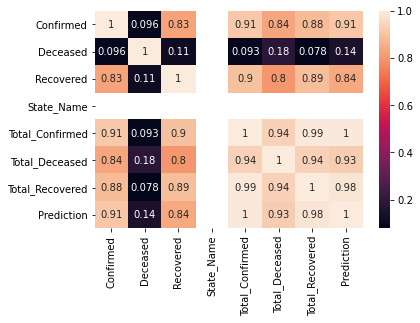

In [10]:
import seaborn as sns

sns.heatmap(dfs.corr(), annot=True)

In [24]:
df.index =pd.to_datetime(df.index)
df.sort_index(inplace=True)

In [6]:
nameCodes = {1: 'Andhra Pradesh',
 17: 'Ladakh',
 16: 'Kerala',
 15: 'Karnataka',
 13: 'Jammu and Kashmir',
 14: 'Jharkhand',
 11: 'Haryana',
 12: 'Himachal Pradesh',
 18: 'Lakshadweep',
 10: 'Gujarat',
 7: 'Dadra and Nagar Haveli and Daman and Diu',
 8: 'Delhi',
 6: 'Chhattisgarh',
 5: 'Chandigarh',
 4: 'Bihar',
 3: 'Assam',
 9: 'Goa',
 20: 'Maharashtra',
 22: 'Meghalaya',
 21: 'Manipur',
 35: 'West Bengal',
 34: 'Uttarakhand',
 33: 'Uttar Pradesh',
 32: 'Tripura',
 30: 'Tamil Nadu',
 0: 'Andaman and Nicobar Islands',
 31: 'Telangana',
 28: 'Rajasthan',
 26: 'Puducherry',
 27: 'Punjab',
 25: 'Odisha',
 24: 'Nagaland',
 23: 'Mizoram',
 19: 'Madhya Pradesh',
 29: 'Sikkim',
 2: 'Arunachal Pradesh'}

In [88]:
nameCodes[1]

'Andhra Pradesh'

In [43]:
X_lately = []

for i in range(36):
    dfs = df.copy()[df['State_Name'] == i]
    dfs["Prediction"] = dfs['Total_Confirmed'].shift(-forecast_out)
    dfs.drop('State_Name',axis=1, inplace=True)
    
    X = dfs.drop('Prediction', axis=1)
    y = dfs['Prediction']
    X_lately.append(X[-forecast_out: ])
    X = X[:-forecast_out]
    y.dropna(inplace=True)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    
    for j in Regressor:
        clf = j()
        clf.fit(X_train, y_train)
        accuracy = clf.score(X_test, y_test)

        print(nameCodes[i], j(), accuracy)    

Andaman and Nicobar Islands Lasso() 0.9568655294551075
Andaman and Nicobar Islands ElasticNet() 0.9826139895706706
Andaman and Nicobar Islands Ridge() 0.9517135936255631
Andhra Pradesh Lasso() 0.971724352880641
Andhra Pradesh ElasticNet() 0.9712149115622329
Andhra Pradesh Ridge() 0.9760572982127314
Arunachal Pradesh Lasso() 0.9780716096207296
Arunachal Pradesh ElasticNet() 0.8875887752383543
Arunachal Pradesh Ridge() 0.9799772840562619
Assam Lasso() 0.9993257777832436
Assam ElasticNet() 0.9993334881532085
Assam Ridge() 0.9993230113490302
Bihar Lasso() 0.9901851964858032
Bihar ElasticNet() 0.990231178931939
Bihar Ridge() 0.9902286423384874
Chandigarh Lasso() 0.996444238797923
Chandigarh ElasticNet() 0.9964177792537983
Chandigarh Ridge() 0.9965354329985368
Chhattisgarh Lasso() 0.9933625800438569
Chhattisgarh ElasticNet() 0.9914839747174984
Chhattisgarh Ridge() 0.9934628462944431


D:\Anaconda\envs\DeepLearninG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164572029.14702657, tolerance: 24336647.853280004
  positive)
D:\Anaconda\envs\DeepLearninG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166385447.34729928, tolerance: 24336647.853280004
  positive)
D:\Anaconda\envs\DeepLearninG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15226558.314374674, tolerance: 1970949.9734592
  positive)
D:\Anaconda\envs\DeepLearninG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number o

Dadra and Nagar Haveli and Daman and Diu Lasso() 0.993901102152897
Dadra and Nagar Haveli and Daman and Diu ElasticNet() 0.9938964179503385
Dadra and Nagar Haveli and Daman and Diu Ridge() 0.9940867380722415
Delhi Lasso() 0.9997876773708051
Delhi ElasticNet() 0.9997876663081515
Delhi Ridge() 0.999784299490629
Goa Lasso() 0.9971401994217612
Goa ElasticNet() 0.9964189218516003
Goa Ridge() 0.9971988961105253
Gujarat Lasso() 0.9997261538431464
Gujarat ElasticNet() 0.9997261679217542
Gujarat Ridge() 0.9997240767626643
Haryana Lasso() 0.9982055875554435
Haryana ElasticNet() 0.998231543155354
Haryana Ridge() 0.9981492887842573
Himachal Pradesh Lasso() 0.9869027424594515
Himachal Pradesh ElasticNet() 0.9873962802640257
Himachal Pradesh Ridge() 0.986407321765338
Jammu and Kashmir Lasso() 0.9909943941781094
Jammu and Kashmir ElasticNet() 0.9909213420372347
Jammu and Kashmir Ridge() 0.990999134309993
Jharkhand Lasso() 0.9963187600340775


D:\Anaconda\envs\DeepLearninG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141788583.93615764, tolerance: 30512630.151480008
  positive)
D:\Anaconda\envs\DeepLearninG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141802453.00930372, tolerance: 30512630.151480008
  positive)
D:\Anaconda\envs\DeepLearninG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98876.7841036166, tolerance: 45801.01386720001
  positive)
D:\Anaconda\envs\DeepLearninG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number o

Jharkhand ElasticNet() 0.9965442933076422
Jharkhand Ridge() 0.9963074391026934
Karnataka Lasso() 0.9978599817381711
Karnataka ElasticNet() 0.9978771892425397
Karnataka Ridge() 0.9978964069989265
Kerala Lasso() 0.9942382202161075
Kerala ElasticNet() 0.9943479917566066
Kerala Ridge() 0.9942210777759233
Ladakh Lasso() 0.9417321085237198
Ladakh ElasticNet() 0.9298114878324703
Ladakh Ridge() 0.9426583933076895
Lakshadweep Lasso() 1.0
Lakshadweep ElasticNet() 1.0
Lakshadweep Ridge() 1.0
Madhya Pradesh Lasso() 0.9990651756346326
Madhya Pradesh ElasticNet() 0.9990619924873845
Madhya Pradesh Ridge() 0.9990747922238116
Maharashtra Lasso() 0.9997945213809866
Maharashtra ElasticNet() 0.9997945210123541
Maharashtra Ridge() 0.9997888596315354
Manipur Lasso() 0.976899362441487


D:\Anaconda\envs\DeepLearninG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 169478190.05797336, tolerance: 19363303.956739202
  positive)
D:\Anaconda\envs\DeepLearninG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 169671572.3193332, tolerance: 19363303.956739202
  positive)
D:\Anaconda\envs\DeepLearninG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7586067.018075277, tolerance: 637807.3955887998
  positive)
D:\Anaconda\envs\DeepLearninG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number o

Manipur ElasticNet() 0.9767249196245843
Manipur Ridge() 0.976915184027264
Meghalaya Lasso() 0.9788039164299692
Meghalaya ElasticNet() 0.9794615795136774
Meghalaya Ridge() 0.9782361723800258
Mizoram Lasso() 0.9928388616160295
Mizoram ElasticNet() 0.992811304135333
Mizoram Ridge() 0.9927696106082065
Nagaland Lasso() 0.9866707976491274
Nagaland ElasticNet() 0.9821263531848674
Nagaland Ridge() 0.9868267510944594
Odisha Lasso() 0.9981994511445087
Odisha ElasticNet() 0.9982462208178978
Odisha Ridge() 0.9982313817871417
Puducherry Lasso() 0.9989325351982252
Puducherry ElasticNet() 0.9989202071485668
Puducherry Ridge() 0.9988982015233254
Punjab Lasso() 0.9859061565299475
Punjab ElasticNet() 0.9861130816241676
Punjab Ridge() 0.9858780886633605
Rajasthan Lasso() 0.9983910017148597
Rajasthan ElasticNet() 0.9983909980862489
Rajasthan

D:\Anaconda\envs\DeepLearninG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7667484.796931475, tolerance: 1222926.2694992
  positive)
D:\Anaconda\envs\DeepLearninG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7720375.711381842, tolerance: 1222926.2694992
  positive)
D:\Anaconda\envs\DeepLearninG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41075.73073380765, tolerance: 16003.398668799997
  positive)
D:\Anaconda\envs\DeepLearninG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

 Ridge() 0.9984233821390446
Sikkim Lasso() 0.9880852636622445
Sikkim ElasticNet() 0.9900715819502105
Sikkim Ridge() 0.986351277592415
Tamil Nadu Lasso() 0.9993713213968319
Tamil Nadu ElasticNet() 0.9993712408951151
Tamil Nadu Ridge() 0.999370184295471
Telangana Lasso() 0.9990902402546948
Telangana ElasticNet() 0.999056750195745
Telangana Ridge() 0.9990284946551881
Tripura Lasso() 0.9930639791505693
Tripura ElasticNet() 0.9926921087049316
Tripura Ridge() 0.9930595659998098
Uttar Pradesh Lasso() 0.999808789970348
Uttar Pradesh ElasticNet() 0.9998089478440279
Uttar Pradesh Ridge() 0.9998064245627525
Uttarakhand Lasso() 0.9944827893642285
Uttarakhand ElasticNet() 0.9946033723688305
Uttarakhand Ridge() 0.9944528082318025
West Bengal Lasso() 0.9997593870343503
West Bengal ElasticNet() 0.999759390903567
West Bengal Ridge() 0.9997636540271058


D:\Anaconda\envs\DeepLearninG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36474428.231460154, tolerance: 5051532.866156802
  positive)
D:\Anaconda\envs\DeepLearninG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37289263.42979755, tolerance: 5051532.866156802
  positive)
D:\Anaconda\envs\DeepLearninG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19754574.92313778, tolerance: 8053647.837251199
  positive)
D:\Anaconda\envs\DeepLearninG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

In [45]:
for i in range(36):
    dfs = df.copy()[df['State_Name'] == i]
    dfs["Prediction"] = dfs['Total_Confirmed'].shift(-forecast_out)
    dfs.drop('State_Name',axis=1, inplace=True)
    
    X = dfs.drop('Prediction', axis=1)
    y = dfs['Prediction']
    X_lately.append(X[-forecast_out: ])
    X = X[:-forecast_out]
    y.dropna(inplace=True)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    
    clf = Ridge()
    clf.fit(X_train, y_train)
    
    joblib.dump(clf, f'Models/{nameCodes[i]}-model.joblib')

In [5]:
predictions = []

for i in range(36):
    clf = joblib.load(f'Models/{nameCodes[i]}-model.joblib')
    prediction = clf.predict(X_lately[i])
    
    predictions.append(list(prediction))

array([91474362.89825787])

In [49]:
predictions

[[2117.350594539548,
  2597.4451325428727,
  2899.834259787331,
  3331.682079387402,
  3777.4999656036316,
  4133.362248673657,
  4566.435268135579],
 [212622.61825909032,
  217345.45183973663,
  233481.88751517702,
  242102.0064565603,
  257544.9487486826,
  273360.568078133,
  286060.01590026537],
 [2005.881993892359,
  2042.3081129432098,
  2017.1156894348737,
  2102.2614815611164,
  2084.973479306442,
  2170.1413538496317,
  2218.4932666062195],
 [55029.3501006703,
  57092.196751548385,
  58761.689664372294,
  62604.26232518652,
  67055.13267324009,
  69224.7319839815,
  72744.70546729706],
 [72947.34347541309,
  77449.57204619428,
  78105.42025564282,
  82072.46434762148,
  86094.4894234204,
  88436.7771677752,
  93496.11254436384],
 [1334.8648515227578,
  1350.374329888222,
  1396.3547126073906,
  1456.1769126706556,
  1526.7768729334155,
  1639.0887951862246,
  1724.943178398944],
 [11258.349909932907,
  11190.517652379882,
  11276.341069458695,
  11452.285279456059,
  11736.619

In [8]:
#________For Prediction Purpose___________

import joblib

clf = joblib.load(f'Models/{nameCodes[14]}-model.joblib')

# Order in which value to be inserted (today_confirmed, today_deceased,today_recovered, total_confirmed, total_decesased, total_recovered)

prediction = clf.predict([[397, 5, 490, 102887, 891, 96485]])

print(prediction)

[141942.80919965]
